In [3]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
np.random.seed(42)

In [4]:
url =  'https://archive.ics.uci.edu/static/public/94/data.csv'
df = pd.read_csv(url)

In [5]:
train, test = np.split(df.sample(frac = 1), [int(0.8*len(df))])
print(f'Size of training data: {len(train)}\nSize of test data: {len(test)}') #80 percent training data, 20 percent test data
train.describe()

C:\Users\Sai\OneDrive\Desktop\databyte submission\databyte_env\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Size of training data: 3680
Size of test data: 921


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
count,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,...,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000
mean,0.104269,0.215918,0.283679,0.064261,0.308299,0.097867,0.113087,0.103304,0.095109,0.247258,...,0.037346,0.136292,0.017741,0.267629,0.076225,0.048231,5.230258,50.295652,283.535326,0.395109
std,0.300405,1.294452,0.504191,1.406851,0.669158,0.278426,0.387176,0.406353,0.290803,0.677303,...,0.240737,0.225278,0.119125,0.688776,0.245851,0.475139,30.122255,129.291311,599.496841,0.488940
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.600000,6.000000,36.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.280500,15.000000,96.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.390000,0.000000,0.000000,0.000000,0.000000,0.170000,...,0.000000,0.190000,0.000000,0.322250,0.056000,0.000000,3.697000,43.000000,268.500000,1.000000
max,4.340000,14.280000,4.540000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,5.277000,4.081000,19.131000,6.003000,19.829000,1021.500000,2042.000000,15841.000000,1.000000


In [6]:
def scale_and_oversample_data(dataset, oversample = False):
    X = df[df.columns[:-1]].values
    y = df[df.columns[-1]].values
    scaler = MinMaxScaler(feature_range = (0, 1))
    ROS = RandomOverSampler()

    scaler.fit(X)
    X = scaler.transform(X)

    if oversample:
        X, y = ROS.fit_resample(X, y)
    data = np.hstack((X, (y.reshape(-1,1))))
    return data, X, y

In [7]:
train, X_train, y_train =  scale_and_oversample_data(train, oversample = True)
test, X_test, y_test = scale_and_oversample_data(test, oversample = False)

In [17]:
svm = SVC()
nb = MultinomialNB()
knn = KNeighborsClassifier()
reg = LogisticRegression()
models = [svm, nb, knn, reg]
def select_model(model_list):
    li = []
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = skl.metrics.accuracy_score(y_test, y_pred)
        li.append(acc)
    i = li.index(max(li))
    return models[i]

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2788
           1       0.94      0.93      0.93      1813

    accuracy                           0.95      4601
   macro avg       0.94      0.94      0.94      4601
weighted avg       0.95      0.95      0.95      4601



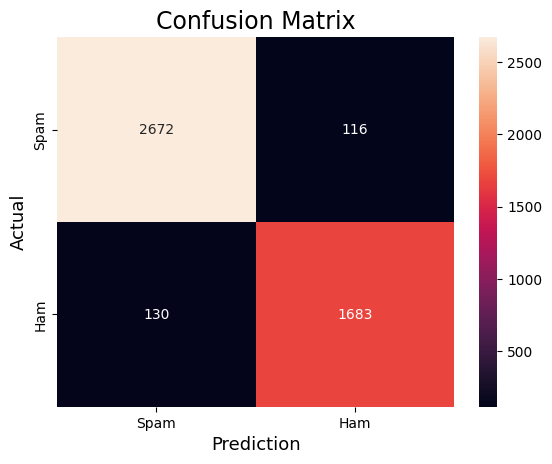

In [18]:
model = select_model(models)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(cm, 
           annot = True,
           fmt = 'g',
           xticklabels=['Spam','Ham'],
            yticklabels=['Spam','Ham'])
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()